<a href="https://colab.research.google.com/github/AryaPratamaPutra-10/AryaPratamaPutra-10/blob/main/Analisis%20Data%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Harga Ikan Lele


1. Import Library yang dipakai

In [116]:
# Install pustaka yang diperlukan (jika belum terinstal)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

2. Import File Data Set

In [75]:
from google.colab import files
upload = files.upload()

Saving Harga_Lele.csv to Harga_Lele.csv


Tampilin Data

In [101]:
df = pd.read_csv('/content/Harga_Lele.csv', sep=';')
df.head()

,Provinsi,Kabupaten/Kota,Tahun,Volume Produksi,Nilai Produksi
0,ACEH,ACEH BARAT,2019,247150,3.707250e+09
1,ACEH,ACEH BARAT DAYA,2019,50900,1.527000e+09
2,ACEH,ACEH BESAR,2019,1250560,1.970712e+10
3,ACEH,ACEH JAYA,2019,900000,1.800000e+10
4,ACEH,ACEH SELATAN,2019,39367,1.181010e+09


3. Memisahkan Fitur dan Target

In [102]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer

# Membaca file CSV ke dalam DataFrame
Harga_Lele = pd.read_csv('/content/Harga_Lele.csv', sep=';')

# Assign Harga_Lele to data
data = Harga_Lele

# cetak nama
print(data.columns)

# Fitur (tahun)
X = data[['Tahun', 'Provinsi']]

# Target: volume_produksi dan nilai_produksi
y_volume = data['Volume Produksi']
y_nilai = data['Nilai Produksi']

# OneHotEncoding untuk kolom 'daerah'
preprocessor = ColumnTransformer(transformers=[('Provinsi', OneHotEncoder(), ['Provinsi'])], remainder='passthrough')

# Transformasi X
X_transformed = preprocessor.fit_transform(X)



Index(['Provinsi', 'Kabupaten/Kota', 'Tahun', 'Volume Produksi',
       'Nilai Produksi'],
      dtype='object')


In [103]:
print(X.head()) # fitur
print(y.head()) # target
print(y.head()) # target

   Tahun Provinsi
0   2019     ACEH
1   2019     ACEH
2   2019     ACEH
3   2019     ACEH
4   2019     ACEH
0     247150
1      50900
2    1250560
3     900000
4      39367
Name: Volume Produksi, dtype: int64
0     247150
1      50900
2    1250560
3     900000
4      39367
Name: Volume Produksi, dtype: int64


3 split dataset into training

In [104]:
# Membagi dataset menjadi 80% data latih dan 20% data uji
#from sklearn.model_selection import train_test_split # import the necessary module
#from sklearn.linear_model import LinearRegression


# Membagi data untuk model prediksi volume_produksi
#X_train, X_test, y_volume_train, y_volume_test = train_test_split(X_transformed, y_volume, test_size=0.2, random_state=42)


# Membagi data untuk model prediksi nilai_produksi
#_, _, y_nilai_train, y_nilai_test = train_test_split(X_transformed, y_nilai, test_size=0.2, random_state=42)


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix, hstack # Import hstack

# Assuming 'df' is your DataFrame and 'volume_produksi' is your target variable
# Assuming features for your model are in columns other than 'volume_produksi' and 'Tahun'
# Replace ... with the actual column names you want to include as features
features = df[['Tahun', 'Volume Produksi', 'Nilai Produksi']]  # Include desired columns

# Extract the target variable
target = df['Volume Produksi'] # Assuming 'Volume Produksi' is the target

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# If you need to convert X_train and X_test into sparse matrices:
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# If you have 'Tahun' column and want to include it in features:
X_train_with_tahun = hstack([X_train_sparse, csr_matrix(X_train[['Tahun']])])
X_test_with_tahun = hstack([X_test_sparse, csr_matrix(X_test[['Tahun']])])

# Now you have:
# X_train_sparse, X_test_sparse: Sparse matrices of features
# y_train, y_test: Target variable for training and testing
# X_train_with_tahun, X_test_with_tahun: Includes 'Tahun' as a feature in sparse matrix format

4 create a Linear Regression model and train

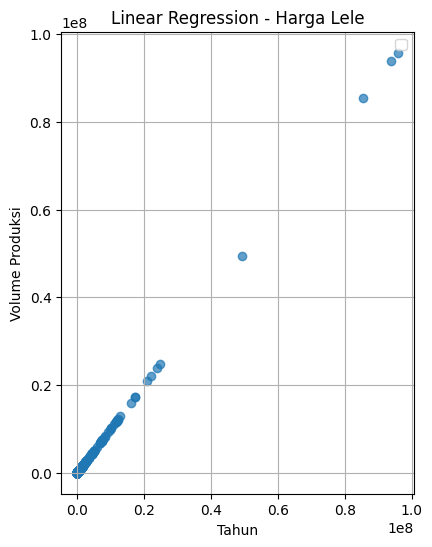

In [156]:


# Membagi data untuk model prediksi nilai_produksi
_, _, y_nilai_train, y_nilai_test = train_test_split(
    X_transformed, y_nilai, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_volume_train)

# Predict on the training and testing data
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# Now you can plot the data
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

# Changed y_test and y_pred_lin to y_volume_test and y_pred_test
plt.scatter(y_volume_test, y_pred_test, alpha=0.7)


plt.title('Linear Regression - Harga Lele')
plt.plot([0, 5], [0, 5], '--', color='red')
plt.xlabel('Tahun')  # Adjust if using different x-axis
plt.ylabel('Volume Produksi')
plt.legend()
plt.grid(True)
plt.show()

In [108]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train) # melatih model dengan data latih
y_pred_en = elastic_net_model.predict(X_test) # Melakukan prediksi pada data uji

Evaluasi the models

In [114]:
# evaluasi
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{model_name} \n - Mean Squared Error: {mse}, \n - R^2 Score: {r2}')

#evaluasi semua model
print("Hasil Evaluasi Keempat model : \n")
evaluate_model(y_volume_test, y_pred_lin, "Linear Regrression")
evaluate_model(y_volume_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_volume_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_volume_test, y_pred_en, "Elastic Net Regression")

Hasil Evaluasi Keempat model : 

Linear Regrression 
 - Mean Squared Error: 63436922764785.06, 
 - R^2 Score: 0.1089346167021874
Ridge Regression 
 - Mean Squared Error: 63406219225968.0, 
 - R^2 Score: 0.10936589330565805
Lasso Regression 
 - Mean Squared Error: 63436891014202.85, 
 - R^2 Score: 0.10893506268606357
Elastic Net Regression 
 - Mean Squared Error: 70013149479072.17, 
 - R^2 Score: 0.016561788348784634


Visualisasi semua Regresi

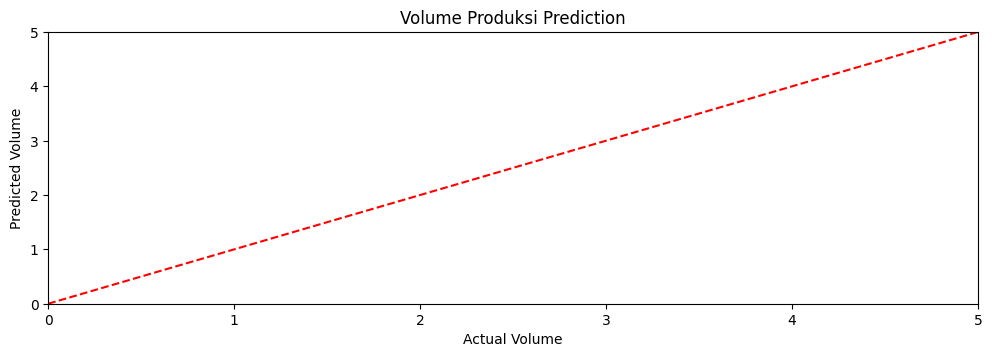

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)

# Ensure y_volume_test and y_pred_lin have the same length
# by truncating the longer array to match the shorter one
min_len = min(len(y_volume_test), len(y_pred_lin))
y_volume_test = y_volume_test[:min_len]
y_pred_lin = y_pred_lin[:min_len]

plt.scatter(y_volume_test, y_pred_lin, alpha=0.7)  # Corrected 'aplha' to 'alpha'
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Volume Produksi Prediction')
plt.plot([0, 5], [0, 5], '--', color='red')

# Use plt.xlim and plt.ylim for setting axis limits
plt.xlim(0, 5)  # Corrected 'xLim' to 'xlim'
plt.ylim(0, 5)  # Corrected 'ylim' to 'ylim'

plt.show() # display the plot

ARIMA

In [56]:
# Prediksi volume_produksi
y_volume_pred = model_volume.predict(X_test)
print("MSE untuk volume_produksi:", mean_squared_error(y_volume_test, y_volume_pred))
print("R^2 untuk volume_produksi:", r2_score(y_volume_test, y_volume_pred))

# Prediksi nilai_produksi
y_nilai_pred = model_nilai.predict(X_test)
print("MSE untuk nilai_produksi:", mean_squared_error(y_nilai_test, y_nilai_pred))
print("R^2 untuk nilai_produksi:", r2_score(y_nilai_test, y_nilai_pred))


MSE untuk volume_produksi: 63436922764785.06
R^2 untuk volume_produksi: 0.1089346167021874
MSE untuk nilai_produksi: 3.156339222137906e+22
R^2 untuk nilai_produksi: 0.0840942342191886


LSTM

In [118]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_volume_scaled = scaler.fit_transform(y_volume.values.reshape(-1, 1))

In [121]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10 # Jumlah langkah waktu sebelumnya yang akan digunakan
X_lstm, y_lstm = create_dataset(y_volume_scaled, look_back)

    # Membagi data menjadi data latih dan data uji
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

In [125]:
# Fit the ARIMA model
model_volume = ARIMA(y_volume, order=(1, 1, 1))  # (p, d, q) are ARIMA parameters
results_volume = model_volume.fit()

# Print model summary
print(results_volume.summary())

# Make predictions
y_volume_pred = results_volume.predict(start=len(y_volume), end=len(y_volume) + len(X_test_lstm) -1 )

# Assuming y_volume_test is the actual values for the test set
# Invert scaling to get actual values
y_volume_pred = scaler.inverse_transform(y_volume_pred.values.reshape(-1, 1))
y_volume_test = scaler.inverse_transform(y_test_lstm.reshape(-1,1))

                               SARIMAX Results                                
Dep. Variable:        Volume Produksi   No. Observations:                 2222
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -38272.440
Date:                Thu, 24 Oct 2024   AIC                          76550.881
Time:                        15:47:12   BIC                          76567.998
Sample:                             0   HQIC                         76557.133
                               - 2222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0211      0.024      0.895      0.371      -0.025       0.067
ma.L1         -0.9590      0.004   -254.027      0.000      -0.966      -0.952
sigma2      6.244e+13   3.26e-17   1.91e+30      0.0

Evaluasi Model

In [126]:
# Evaluate the model
print("MSE for volume_produksi:", mean_squared_error(y_volume_test, y_volume_pred))
print("R^2 for volume_produksi:", r2_score(y_volume_test, y_volume_pred))

MSE for volume_produksi: 1.3741639559317042e+29
R^2 for volume_produksi: -3760296004910178.5


Visualisasi Model

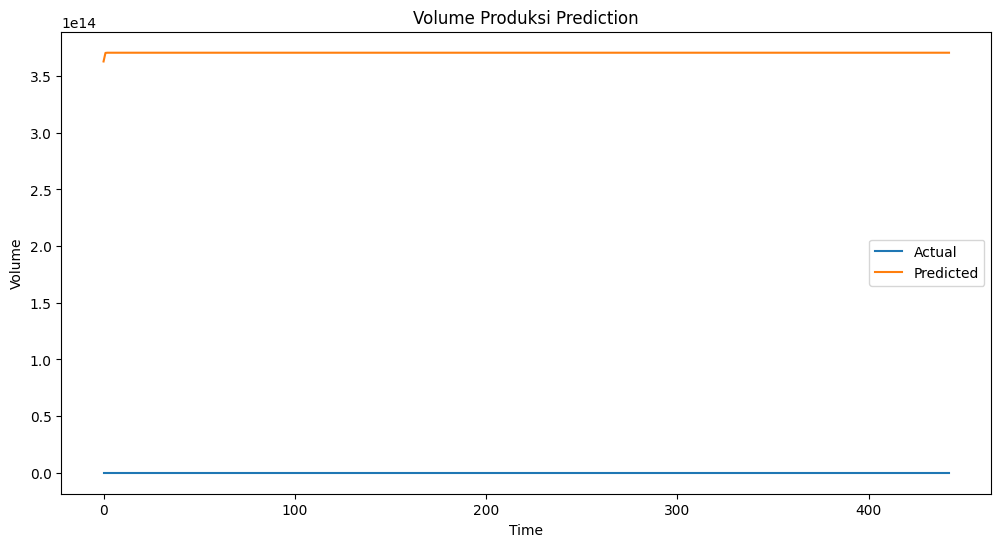

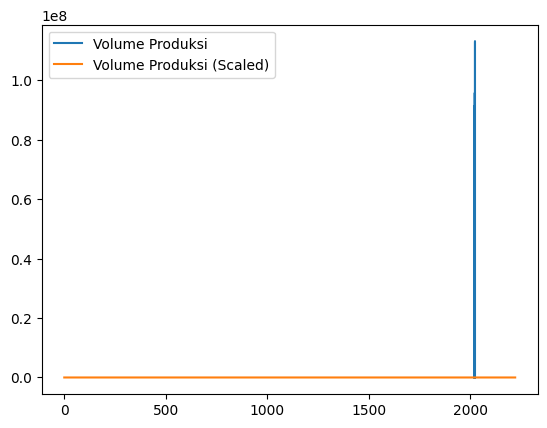

In [135]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_volume_test, label='Actual')
plt.plot(y_volume_pred, label='Predicted')
plt.title('Volume Produksi Prediction')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.legend()
plt.show()

plt.plot(df['Tahun'], y_volume, label='Volume Produksi') # Jika memvisualisasikan data asli
plt.plot(range(len(y_volume_scaled)), y_volume_scaled, label='Volume Produksi (Scaled)') # Jika memvisualisasikan data scaled
plt.legend()
plt.show()

**Analisis**




Data set yang digunakan diatas adalah data set adalah data set Volume produksi lele dan nilai produksi lele di semua provinsi di Indonesia dalam tahun 2019 - 2022 yang diambil dari Badan Pusat Statistik

Data set yang digunakan masih kurang lengkap sehinnga tidak bisa melakukan prediksi dengan akurat karena kurangnya faktor dalam data set tersebut

Model yang digunakan diatas ada Regresi Linear, Regresi Ridge, Regresi Lasso, dan Regresi Elastic Net dan juga menggunakan LSTM. Hasil Prediksi yang di dapat Regresi Linear cocok dengan data set yang digunakan sedangkan untuk model yang lainnya tidak efektif karena data set yang digunakan masih kurang

Kekurangan = Beberapa model yang digunakan mengalami Overfitting karena data set terlalu kecil dan tidak memiliki hubungan yang jelas dan linear.